# Homework 3

This homework will explore linear regression and resampling techniques by analysing data from a database of glaciers. The database is *Glatilda* for [*Glacier Ice Thickness Database*](!https://www.gtn-g.ch/data_catalogue_glathida/).

1. Data prep (5 points)
2. Mapping (10 points)
3. Correlations between parameters (5 points)
4. Linear regression and resampling techniques (10 points)

## 1. Data Prep (5 points total)

### a) Download data (1 point) 
The database is saved on a GitLab repository that you may clone: https://gitlab.com/wgms/glathida.git



'/home/jovyan/class_dirs/mlgeo2022_2127014/homework'

In [1]:
import pandas as pd 
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import rasterio
import netCDF4 as nc
import requests
import io

In [2]:
# get data from gitlab via requests
url = "https://gitlab.com/wgms/glathida/-/raw/main/data/glacier.csv"
req = requests.get(url).content
# decode and clean up data
df = pd.read_csv(io.StringIO(req.decode('utf-8')),sep=',',on_bad_lines='skip')

### b) Import Python modules (1 point) 
Import pandas, geopandas, plotting, raster files,  numpy, netcdf

In [3]:
# solution- above in a)

### c) Read data (2 points)
Read the glacier data from the file ``glathida/data/glacier.csv`` into a pandas data frame, and decribe briefly the dataframe content and its first few lines.

In [4]:
# solution- above in a)

**Explore the data with visualization**
Before making any inference of models with the data, we will start by exploring basic correlations among parameters by plotting. In particular, we will focus on ``mean_thickness``, ``area``, ``mean_slope`` parameters.

### d) Remove bad data (1 point)

The database may contain Nans and other "bad" values (welcome to the data world!). First we will clean the data by removing nans. We are mostly interested in the thickness, area, and slope



In [5]:
#answer below 
df.columns

Index(['id', 'survey_id', 'name', 'external_db', 'external_id', 'lat', 'lon',
       'date', 'max_date', 'area', 'mean_slope', 'mean_thickness',
       'mean_thickness_uncertainty', 'max_thickness',
       'max_thickness_uncertainty', 'number_points', 'number_profiles',
       'length_profiles', 'interpolation_method', 'flag', 'remarks'],
      dtype='object')

In [6]:
clean = df.dropna(subset=['area','mean_slope','mean_thickness'], how='any')
len(clean)
# reduces length of dataset from 1013 -> 110

110

## 2. Mapping glaciers (10 points)

Make a global map of the glaciers. Use either of the tools we learned in class:
* Geopandas, DEMs from NetCDFfiles (see chapter 2.4)
* Pandas and Plotly (see chapter 2.2). You may need to transform some of the series into log-spaced values for better visualization.

### Option 1: Tif and matplotlib

You can use the ``elevation`` data from the DEM seen in class. Download the DEM file (https://www.dropbox.com/s/j5lxhd8uxrtsxko/HYP_50M_SR.tif?dl=1)

In [72]:
# solution
url = 'https://www.dropbox.com/s/j5lxhd8uxrtsxko/HYP_50M_SR.tif?dl=1'
resp = requests.get(url)
resp.raise_for_status()
# convert to byte stream
sio = io.BytesIO(resp.content)
elevation = rasterio.open(sio)

In [73]:
elevation.shape

(5400, 10800)


___Tips___: when plotting a image in ``matplotlib`` you need to add information about the physical dimensions of the image. You can calculate the ``bounds``.

In [74]:
bounds = (elevation.bounds.left, elevation.bounds.right, \
          elevation.bounds.bottom, elevation.bounds.top)

In [75]:
bounds

(-179.99999999999997, 179.99999999996405, -89.99999999998201, 90.0)

We will use ``matplotlib.pyplot`` to show the raster image in the background (tips: use ``imshow()``. The raster image in matplotlib can only import one frame and not three (R, G, B) frames. We will first stack the three images together. 

In [76]:
red = elevation.read(1)
green = elevation.read(2)
blue = elevation.read(3)
pix = np.dstack((red, green, blue))

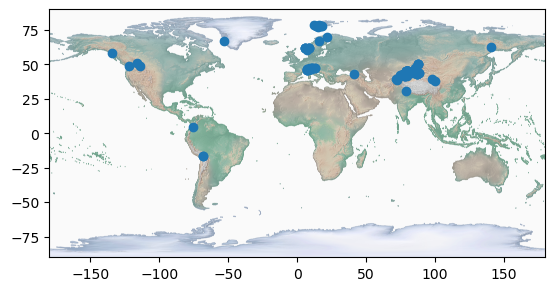

In [101]:
# solution
plt.imshow(pix,extent=[bounds[0], bounds[1], bounds[2],bounds[3]])
plt.scatter(clean['lon'], clean['lat'])

## Option 2: Plotly

You may use plotly. For improved visibility, transform some of the data into log-spaced. You may add these transformed Series into the Pandas, and use them as input to plotly.

In [93]:

import plotly.express as px
import plotly.io as pio
#pio.renderers.default = 'vscode' # writes as standalone html, 
pio.renderers.default = 'iframe' # writes files as standalone html, 
# pio.renderers.default = 'png' # writes files as standalone html, 
# try notebook, jupyterlab, png, vscode, iframe

## 3. Correlations between data parameters ( 5 points total)

Make plots to vizualise the correlation, or lack of, between all three data. Make at least three plots.

### a) Basic correlations using Matplotlib (2 points)

Make 3 plots using matplotlib to visualize slope, mean_thickness, and area. Use logscale to see the correlatons.

__Tips__: 
* Use the function ``scatter`` to plot the values of mean thickness, mean slope, area, and latitude. 
* use one of the dataframe columns as a color using the argument ``c``. You can also vary the ``colormap`` using the argument ``cmap``. Help on colormaps can be found here: https://matplotlib.org/stable/tutorials/colors/colormaps.html. Be mindful of Color-Vision Deficient readers and read *Crameri, F., Shephard, G.E. and Heron, P.J., 2020. The misuse of colour in science communication. Nature communications, 11(1), pp.1-10. https://doi.org/10.1038/s41467-020-19160-7* (find it on the class Gdrive). You can add a third "data" by choosing a marker color that scales with an other parameter. For instance, try coloring your marker with the ``LAT`` parameter to look at systematic latitudinal trends from the equator to the poles.
* Do not forget to adjust fontsize, figure size (at least 10,8), grid, labels with  of the features (example: km). ou may also explore the *logarithmic* correlations by mapping the axis from linear to logarithmic scale ``plt.xscale('log')``.

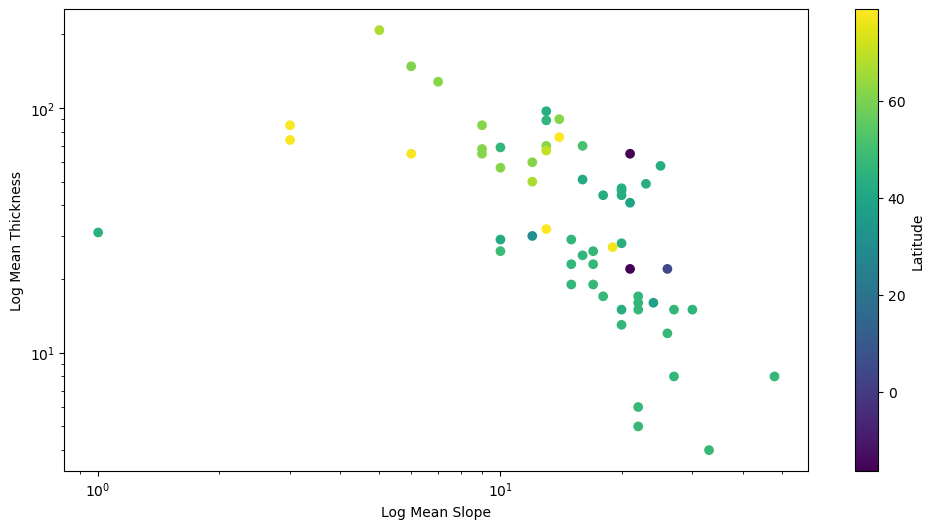

In [7]:
# Figure 1: Mean slope vs mean thickness
fig, axs = plt.subplots(figsize=(12,6))
x=clean['mean_slope']
y=clean['mean_thickness']
color=clean['lat']
st = axs.scatter(x,y,c=color,cmap='viridis')
cbar = fig.colorbar(st, ax=axs)
cbar.set_label('Latitude')
axs.set_xlabel('Log Mean Slope')
axs.set_ylabel('Log Mean Thickness')
plt.xscale('log')
plt.yscale('log')

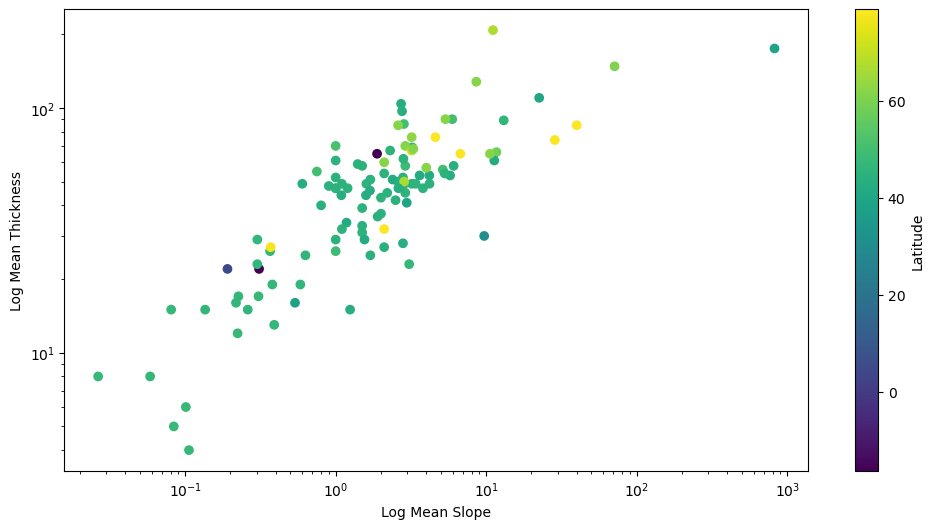

In [8]:
# Figure 2: area vs mean thickness
fig, axs = plt.subplots(figsize=(12,6))
x=clean['area']
y=clean['mean_thickness']
color=clean['lat']
st = axs.scatter(x,y,c=color,cmap='viridis')
cbar = fig.colorbar(st, ax=axs)
cbar.set_label('Latitude')
axs.set_xlabel('Log Mean Slope')
axs.set_ylabel('Log Mean Thickness')
plt.xscale('log')
plt.yscale('log')

### b) 3D Scatter plot using Plotly (1 point)

Use the plotly ``scatter_3d`` plot. Make sure to change the pandas series for log scales.

/srv/conda/envs/notebook/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


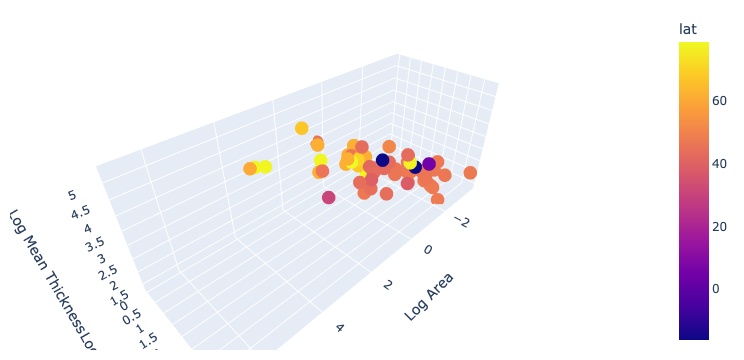

In [9]:
# solution
fig = px.scatter_3d(clean, x=np.log(clean['area']),
              y=np.log(clean['mean_slope']), 
              z=np.log(clean['mean_thickness']),
              color='lat')
fig.update_layout(scene = dict(
                    xaxis_title='Log Area',
                    yaxis_title='Log Mean Slope',
                    zaxis_title='Log Mean Thickness'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))

### c) Pandas Correlation function (1 point)

You may use Pandas functionalities to explore correlation between data. Use the function ``corr`` on the dataframe and the matplotlib function ``matshow`` to plot a heatmap of the correlations

/tmp/ipykernel_87/1400861492.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



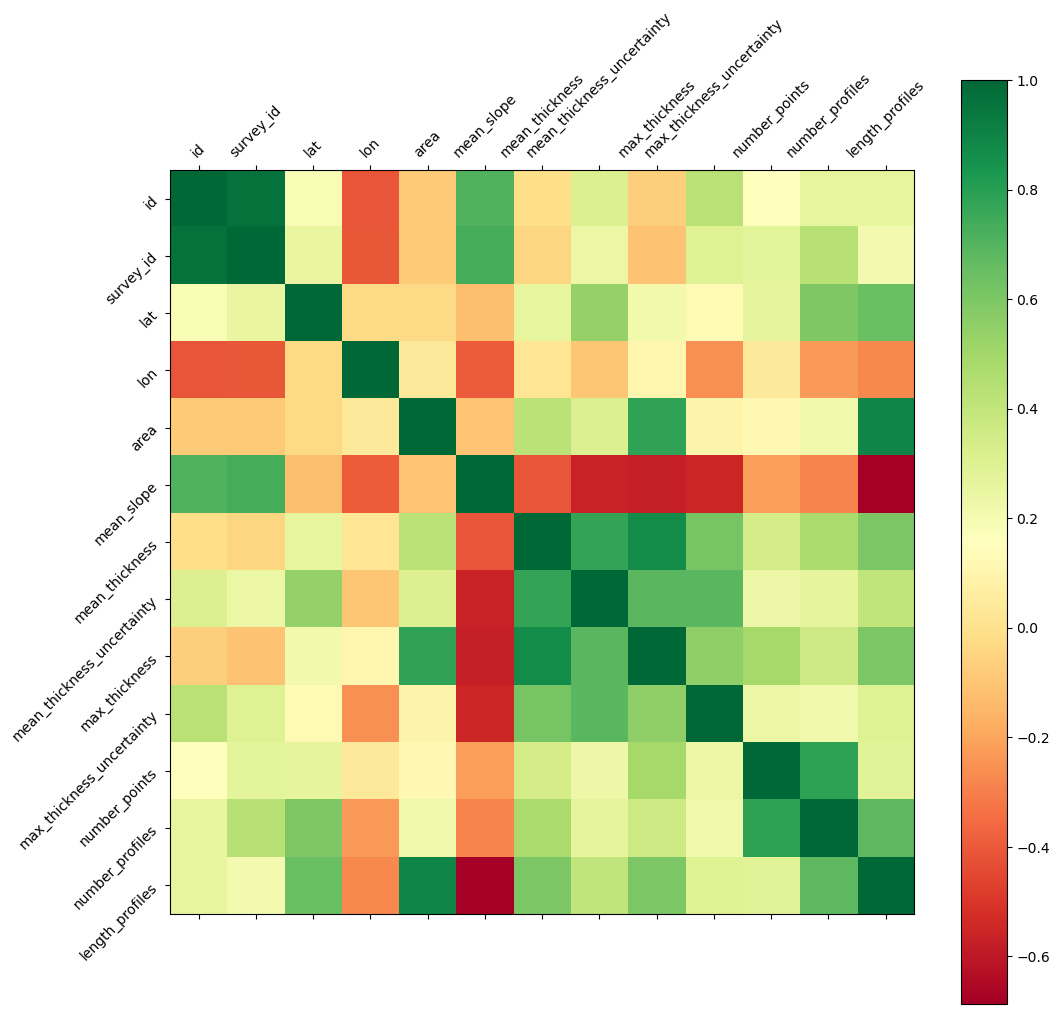

In [10]:
corr_tbl = clean.corr()
cols = list(corr_tbl.columns)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)  
cax = ax.matshow(corr_tbl, cmap=plt.cm.RdYlGn)
fig.colorbar(cax)

ax.set_xticks(np.arange(len(cols)))  
ax.set_yticks(np.arange(len(cols)))  
ax.set_xticklabels(cols, rotation=45) 
ax.set_yticklabels(cols, rotation=45)

plt.show()

### f) Seaborn Plotting (1 point)

Seaborn is a great python package for basic data anlytics. See documentation [here](!https://seaborn.pydata.org/). You can visualize the data by plotting data features against each other and explore visually data correlations.

In [ ]:
# solution
import seaborn as sns
sns.pairplot(corr_tbl, annot=True)

Discuss the basic correlations among pairplotdata. Do these correction make sense when you think about the shapes of glaciers?

Yes they make sense. With more area, the glacier could be older and potentially thicker. However, a higher slope could indicate that the glacier is less stable and could accumulate less material, making it less thick.

## 4. Linear Regression (10 points total counted in the next section)
You found from basic data visualization that the three parameters ``mean_slope``, ``mean_thickness``, and ``area`` are correlated. It does make physical sense because a *steep* glaciers is likely to be in the high mountains regions, hanging on the mountain walls, and thus be constrained, and conversely, a flat glacier is either at its valley, ocean terminus or on ice sheets.

### a) Simple linear regression (2 points)
We will now perform a regression between the parameters (or their log!). Linear regressions are models that can be imported from scikit-learn. Log/exp functions in numpy as ``np.log()`` and ``np.exp()``.
Remember that a linear regression is finding $a$ and $b$ knowing both $x$ and the data $y$ in $y = Ax +b$. We want to predict ice thickness from a crude estimate of the glacier area.

__Tips__: 
a. make sure that the dimensions are correct and that there is no NaNs and zeros.
b. Make sure to inport the scikit learn linear regression function and the error metrics.

In [98]:
corr_df = clean[['mean_thickness', 'area']]
log_corr_df = corr_df.apply(lambda x: np.log(x))

In [106]:
# solution
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x = log_corr_df['area'].values
y = log_corr_df['mean_thickness'].values
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

regr = LinearRegression()
regr.fit(x, y)


LinearRegression()

Make a plot of the data and the linear regression your performed

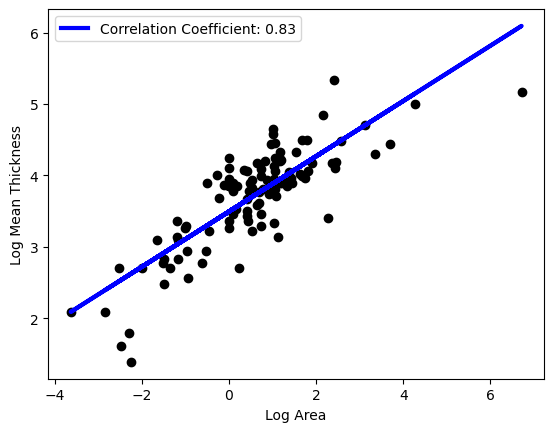

In [107]:
# solution
corr = np.round(log_corr_df['area'].corr(log_corr_df['mean_thickness']), 2)

plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3, 
         label=f'Correlation Coefficient: {corr}')
plt.xlabel('Log Area')
plt.ylabel('Log Mean Thickness')

plt.legend()
plt.show()

**Briefly comment on the quality of your fit and a linear regression (1 point)**

In [108]:
print(f'R2: {r2_score(y, regr.predict(x))}')
print(f'MSE: {mean_squared_error(y, regr.predict(x))}')

R2: 0.680677666244965
MSE: 0.15549965551384437


The fit looks pretty strong, and the correlation coefficient is high (0.83). This demonstrates a strong fit between log area and log mean thickness. The R2 value is also high (0.68), which indicates that the regression model explains a decent amount of variation in the data. The MSE is also low and close to 0, which shows a good fit between the predicted and real values of mean thickenss. There are a few outliers above and below the line, but the overall model fit is strong. 

### b) Leave One Out Cross Validation linear regression (1 point)


Perform the LOCCV on the ``area`` and ``thickness`` values. Predict the ``thickness`` value knowing a ``area`` value. Use material seen in class. Make a plot of your fit.

In [41]:
# define vars- run on log transformed data
x = log_corr_df['area'].values
y = log_corr_df['mean_thickness'].values
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

In [85]:
from sklearn.model_selection import LeaveOneOut
import warnings
warnings.filterwarnings("ignore")

## solution
# function
loo = LeaveOneOut()

vel = np.zeros(len(y)) # initalize a vector to store the regression values
mse_train = np.zeros(len(y))
mse_val = np.zeros(len(y))
r2s = np.zeros(len(y))
val_t = np.zeros(len(y))
val_preds = np.zeros(len(y))

i=0
for train_index, val_index in loo.split(y):
    E_train, E_val = y[train_index], y[val_index]
    t_train, t_val = x[train_index], x[val_index]
    # now fit the data on the training set.
    regr = LinearRegression()
    # Fit on training data:
    regr.fit(t_train,E_train)
    # We will first predict the fit:
    Epred_train=regr.predict(t_train) 
    Epred_val=regr.predict(t_val) 

    # The coefficients
    vel[i]= regr.coef_[0][0]
    mse_train[i]= mean_squared_error(E_train, Epred_train)
    mse_val[i]= mean_squared_error(E_val, Epred_val)
    r2s[i]=r2_score(E_val, Epred_val)
    
    val_preds[i]=Epred_val
    val_t[i]=t_val
    i+=1

# the data shows cleary a trend, so the predictions of the trends are close to each other:
print("mean of the thickness coefficients: %f4.2 and the standard deviation %f4.2"%(np.mean(vel),np.std(vel)))
# the test error is the average of the mean-square-errors
print("CV = %4.2f"%(np.mean(mse_val)))

mean of the thickness coefficients: 0.3874254.2 and the standard deviation 0.0038324.2
CV = 0.17


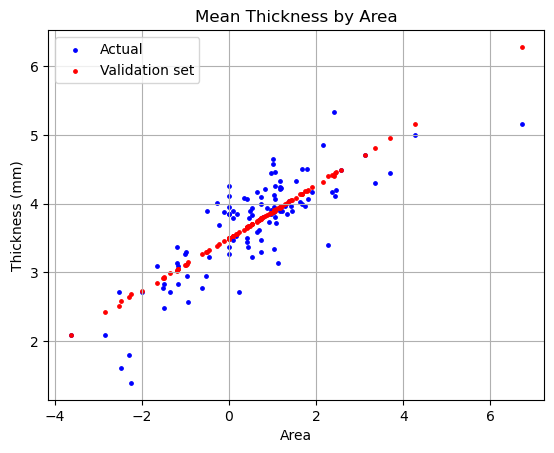

In [90]:
# plot actual and validation results
plt.scatter(x,y,marker="o",s=6,c="blue");plt.grid(True);plt.ylabel('Thickness (mm)')
plt.scatter(val_t,val_preds,marker="o",s=6,c="red")
plt.xlabel('Area')
plt.title('Mean Thickness by Area')
plt.legend(['Actual','Validation set'])

### c) Bootstrapping (1 point)

Perform the same analysis but using a bootstrapping technique. Output the mean and standard deviation of the slope. An illustration with a histogram  may help. [tutorial](!https://ethanwicker.com/2021-02-23-bootstrap-resampling-001/)

mean of the thickness estimates 0.3911194.2 and the standard deviation 0.0339314.2


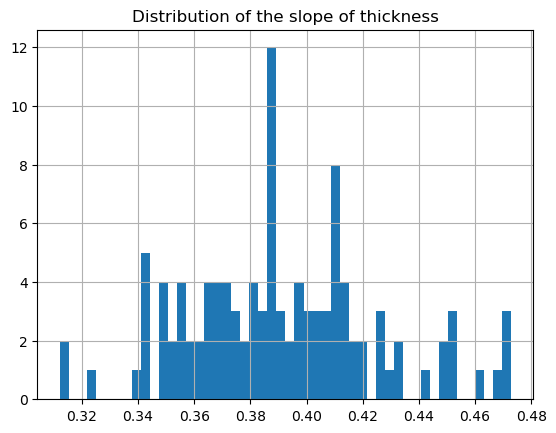

In [122]:
from sklearn.utils import resample
# solution

# k = num of iterations to run
k=100
thick = np.zeros(k) # initalize a vector to store the regression coeffients
mse = np.zeros(k)
r2s = np.zeros(k)
i=0

for iik in range(k):    
    ii = resample(np.arange(len(y)),replace=True,n_samples=len(y))# new indices
    E_b, t_b = y[ii], x[ii]
    # now fit the data on the training set.
    regr = LinearRegression()
    # Fit on training data:
    regr.fit(t_b,E_b)
    Epred_val=regr.predict(x) # test on the validation set.

    # The coefficients
    vel[i]= regr.coef_[0][0]
    # get predicted vals for validation set
    i+=1

# the data shows cleary a trend, so the predictions of the trends are close to each other:
print("mean of the thickness estimates %f4.2 and the standard deviation %f4.2"%(np.mean(vel),np.std(vel)))

plt.hist(vel,50);plt.title('Distribution of the slope of thickness');plt.grid(True)
plt.show()

In [109]:
data = log_corr_df
# Defining number of iterations for bootstrap resample
n_iterations = 100

# Initializing estimator
lin_reg = LinearRegression()

# Initializing DataFrame, to hold bootstrapped statistics
bootstrapped_stats = pd.DataFrame()

# Each loop iteration is a single bootstrap resample and model fit
for i in range(n_iterations):

    # Sampling n_samples from data, with replacement, as train
    # Defining test to be all observations not in train
    train = resample(data, replace=True, n_samples=len(data))
    test = data[~data.index.isin(train.index)]

    X_train = train.loc[:, ["area"]]
    y_train = train.loc[:, ["mean_thickness"]]

    X_test = test.loc[:, ["area"]]
    y_test = test.loc[:, ["mean_thickness"]]

    # Fitting linear regression model
    lin_reg.fit(X_train, y_train)

    # Storing stats in DataFrame, and concatenating with stats
    intercept = lin_reg.intercept_
    beta_area = lin_reg.coef_.ravel()[0]
    r_squared = lin_reg.score(X_test, y_test)

    bootstrapped_stats_i = pd.DataFrame(data=dict(
        intercept=intercept,
        beta_area=beta_area,
        r_squared=r_squared
    ))

    bootstrapped_stats = pd.concat(objs=[bootstrapped_stats,
                                         bootstrapped_stats_i])

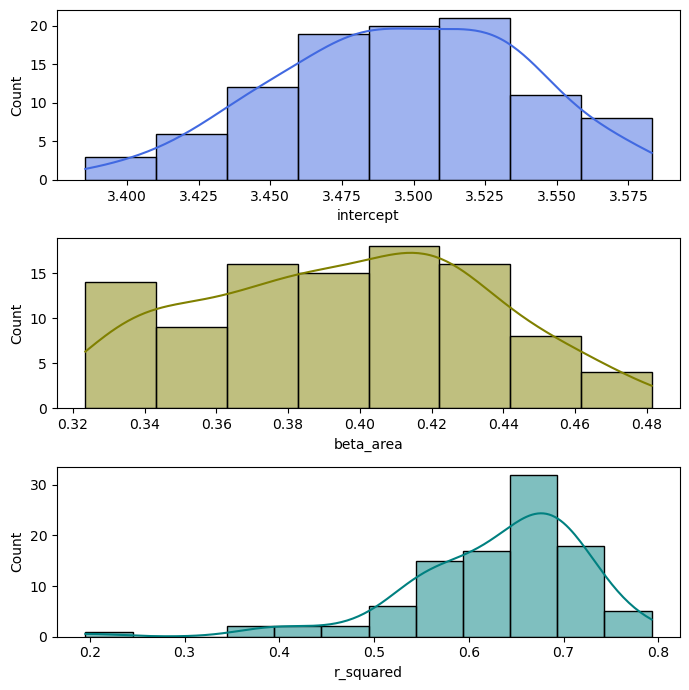

In [110]:
# Plotting histograms
fig, axes = plt.subplots(3, 1, figsize=(7, 7))
sns.histplot(bootstrapped_stats["intercept"], color="royalblue", ax=axes[0], kde=True)
sns.histplot(bootstrapped_stats["beta_area"], color="olive", ax=axes[1], kde=True)
sns.histplot(bootstrapped_stats["r_squared"], color="teal", ax=axes[2], kde=True)
plt.tight_layout()

### d) Predict the thickness of a glacier (2 points)

Let assume that you measure a glacier of area 10 km$^2$. Can you use your bootstrap regression framework to provide a distribution of possible values of the ice thickness ? Output the mean and standard deviation of the predicted ice thickness.

mean of the thickness estimates 81.9573664.2 and the standard deviation 5.9482134.2


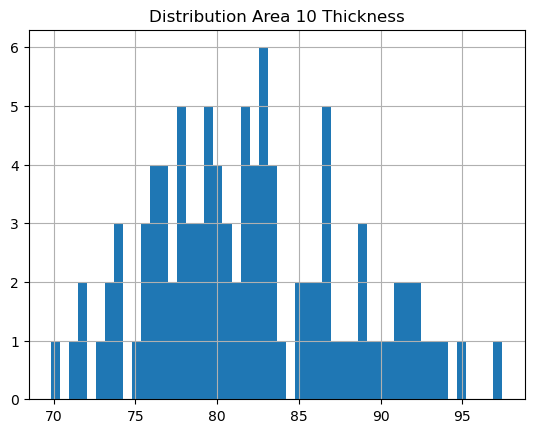

In [114]:
# solution
k=100
thick = np.zeros(k) # initalize a vector to store the regression coeffients
mse = np.zeros(k)
r2s = np.zeros(k)
preds = np.zeros(k)
i=0

for iik in range(k):    
    ii = resample(np.arange(len(y)),replace=True,n_samples=len(y))# new indices
    E_b, t_b = y[ii], x[ii]
    # now fit the data on the training set.
    regr = LinearRegression()
    # Fit on training data:
    regr.fit(t_b,E_b)
    pred_val = regr.predict([[np.log(10)]])
    # add to list
    preds[i]= pred_val
    # get predicted vals for validation set
    i+=1

# the data shows cleary a trend, so the predictions of the trends are close to each other:
print("mean of the thickness estimates %f4.2 and the standard deviation %f4.2"
      %(np.mean(np.exp(preds)),np.std(np.exp(preds))))

plt.hist(np.exp(preds),50);plt.title('Distribution Area 10 Thickness');plt.grid(True)
plt.show()